#                                                Youtube Adview Prediction

# Step 1: Import the datasets and libraries, check shape and datatype.

In [84]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [85]:
# Importing data
path = "train.csv"
data_train = pd.read_csv(path)

In [86]:
#displaying the data 
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [87]:
#checking the shape
data_train.shape

(14999, 9)

In [88]:
#describing the data
data_train.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [89]:
#to check the datatype
data_train.dtypes


vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [90]:
type(data_train)

pandas.core.frame.DataFrame

# Step 2: Visualise the dataset using plotting using heatmaps and plots.

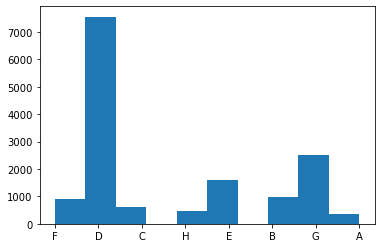

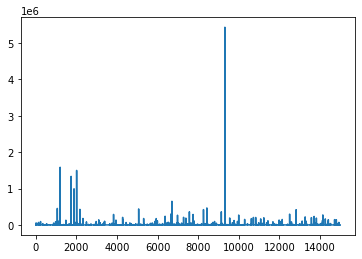

In [91]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [92]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


C:\Users\sheet\AppData\Local\Temp/ipykernel_7112/1077671707.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


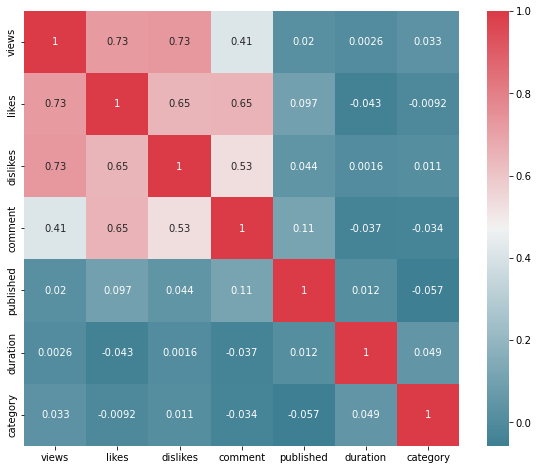

In [107]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

# Step 3: Clean the dataset by removing missing values and other things.

In [94]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [95]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


# Step 4: Transform attributes into numerical values and other necessary transformations

In [96]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [97]:
column_vidid=data_train['vidid']

In [98]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])


In [99]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [100]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# Step 5: Normalise your data and split the data into training, validation and test set in the appropriate ratio

In [129]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

# Step 6: Use linear regression, support vector regressor, random forest and for training and get errors.

In [102]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [103]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245306
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [104]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

D:\Anaconda\Anaconda_Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3707.3780058245306
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


# Step 7: Use Decision Tree Regressor and Random Forest Regressors.

In [112]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2517.6731557377047
Mean Squared Error: 871818686.1431011
Root Mean Squared Error: 29526.575929882238


In [115]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\sheet\AppData\Local\Temp/ipykernel_7112/3179977126.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3259.993886541128
Mean Squared Error: 618610853.6106846
Root Mean Squared Error: 24871.888822738907


# Step 8: Build an artificial neural network and train it with different layers and hyperparameters. Experiment a little. Use keras.

In [80]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 615us/step - loss: 767407616.0000 - mean_squared_error: 767407616.0000
Epoch 2/100
366/366 [==============================] - 0s 647us/step - loss: 767407360.0000 - mean_squared_error: 767407360.0000
Epoch 3/100
366/366 [==============================] - 0s 628us/step - loss: 767406784.0000 - mean_squared_error: 767406784.0000
Epoch 4/100
366/366 [==============================] - 0s 617us/step - loss: 767406528.0000 - mean_squared_error: 767406528.0000
Epoch 5/100
366/366 [==============================] - 0s 619us/step - loss: 767403840.0000 - mean_squared_error: 767403840.0000
Epoch 6/100
366/366 [==============================] - 0s 614us/step - loss: 767395200.0000 - mean_squared_error: 767395200.0000
Epoch 7/100
366/366 [==============================] - 0s 622us/step - loss: 767383232.0000 - mean_squared_error: 767383232.0000
Epoch 8/100
366/366 [==============================] - 0s 617us/step - loss: 767368192.0000 - mea

# Step 9: Pick the best model based on error as well as generalisation

In [ ]:
#Decision Tree Regressor model has the least Mean Absolute Error. Hence preferring to use the Decision Tree Regressor Model.

# Step 10: Save your model and predict on the test set.

In [117]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# Testing with a completely unknown data from 'test.csv' to make the final predictions for evaluation from the chosen model in the previous step.


In [130]:
#Importing data
data_test = pd.read_csv("test.csv")

In [131]:
#displaying the data 
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [132]:
#checking the shape
data_test.shape

(8764, 8)

In [135]:
#describing the data
data_test.describe()

,vidid,views,likes,dislikes,comment,published,duration,category
count,8764,8764,8764,8764,8764,8764,8764,8764
unique,8764,8605,3434,1215,1556,2109,2330,8
top,VID_1054,688,2,0,0,2016-08-26,PT31S,D
freq,1,3,89,662,727,32,120,4419


In [136]:
#to check the datatype
data_test.dtypes

vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [137]:
type(data_test)

pandas.core.frame.DataFrame

In [139]:
# Load the model from the file
dtr_from_joblib = joblib.load('decisiontree_youtubeadview.pkl')

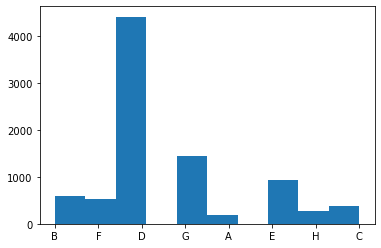

In [140]:
# Visualization
# Individual Plots
plt.hist(data_test["category"])
plt.show()

In [147]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [148]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [149]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

In [150]:
column_vidid=data_test['vidid']

In [151]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [152]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("test.csv")
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [153]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,2
1,1040132,8171,340,1047,1825,570,6
2,28534,31,11,1,1009,136,4
3,1316715,2284,250,274,116,262,7
4,1893173,2519,225,116,1892,31,2


In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [161]:
prediction_dtr = dtr_from_joblib.predict(X_test)

In [162]:
prediction_dtr=pd.DataFrame(prediction_dtr)
prediction_dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [163]:
prediction_dtr = prediction_dtr.rename(columns={0: "Adview"})

In [164]:
prediction_dtr.head()

,Adview
0,4.0
1,21.0
2,4.0
3,64.0
4,12.0


In [165]:
# A demo for implementation of Artificial Neural Network Model for prediction
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [166]:
prediction_ann = dtr_from_joblib.predict(X_test)

In [167]:
prediction_ann=pd.DataFrame(prediction_ann)
prediction_ann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [168]:
prediction_ann = prediction_ann.rename(columns={0: "Adview"})

In [169]:
prediction_ann.head()

,Adview
0,4.0
1,21.0
2,4.0
3,64.0
4,12.0


In [170]:
prediction_dtr.to_csv('predictions_dtr.csv') #predictions using Decision Tree Regressor model

In [171]:
prediction_ann.to_csv('predictions_ann.csv') #predictions using Artificial Neural Network model